# PR Forecast 2082: Scenarios, Threshold, and Seat Allocation (110 PR seats)

This notebook translates national vote-share forecasts into PR seats under Nepal’s rules.

## What this notebook covers
- Baseline national PR vote-share forecast (from district model aggregation)
- Scenario overlays to handle fragmentation and political shock:
  - **Option A:** micro-party consolidation (structure-only)
  - **Option B:** consolidation + social tilt / backlash penalty
  - **Option B + Shock:** gated high-impact tilt for focal challenger parties
- Nepal PR rules:
  - **3% national threshold**
  - **Sainte-Laguë** allocation for **110 PR seats**
- Side-by-side comparison of national shares and seat outcomes

## Key interpretation note
Scenario overlays are not presented as “truth.”  
They are **transparent assumptions** designed to explore plausible coordination dynamics in a non-routine election environment.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 80)


In [3]:
os.chdir(r"C:\Users\dipes\Desktop\election-analytics-nepal-2082")
print(os.getcwd())

C:\Users\dipes\Desktop\election-analytics-nepal-2082


In [4]:
NATL_PRED_PATH = "data/outputs/pr_predictions_national_2082.csv"

BASELINE_PATH = "data/outputs/pr_national_baseline.csv"
A_PATH = "data/outputs/pr_national_consolidated_structure.csv"
B_PATH = "data/outputs/pr_national_consolidated_social_tilt.csv"
BSHOCK_PATH = "data/outputs/pr_national_consolidated_social_tilt_shock.csv"

COMPARE_PATH = "data/outputs/pr_national_compare_baseline_vs_A_vs_B_vs_Bshock.csv"

SEATS_BASELINE_PATH = "data/outputs/pr_seats_baseline.csv"
SEATS_A_PATH = "data/outputs/pr_seats_consolidated_structure.csv"
SEATS_B_PATH = "data/outputs/pr_seats_consolidated_social_tilt.csv"
SEATS_BSHOCK_PATH = "data/outputs/pr_seats_consolidated_social_tilt_shock.csv"


In [5]:
natl_pred = pd.read_csv(NATL_PRED_PATH)

baseline = pd.read_csv(BASELINE_PATH)
A = pd.read_csv(A_PATH)
B = pd.read_csv(B_PATH)
Bshock = pd.read_csv(BSHOCK_PATH)

compare = pd.read_csv(COMPARE_PATH)

seats_base = pd.read_csv(SEATS_BASELINE_PATH)
seats_A = pd.read_csv(SEATS_A_PATH)
seats_B = pd.read_csv(SEATS_B_PATH)
seats_Bshock = pd.read_csv(SEATS_BSHOCK_PATH)

(baseline.shape, A.shape, B.shape, Bshock.shape, compare.shape)


((86, 2), (86, 2), (86, 3), (86, 4), (86, 10))

In [6]:
baseline.head(10), A.head(10), B.head(10), Bshock.head(10)


(  party_id  pred_vote_share_national
 0     P002                 18.740812
 1     P001                 18.334889
 2     P004                 14.242661
 3     P003                  9.942509
 4     P007                  4.810570
 5     P005                  4.656625
 6     P046                  3.483480
 7     P014                  3.092513
 8     P009                  2.615698
 9     P006                  2.388144,
   party_id  pred_vote_share_national
 0     P002                 20.626325
 1     P001                 20.179562
 2     P004                 15.675615
 3     P003                 10.942825
 4     P007                  5.294561
 5     P005                  5.125128
 6     P046                  3.833952
 7     P014                  3.403650
 8     P009                  2.878864
 9     P006                  2.628415,
   party_id  pred_vote_share_national  z_social
 0     P002                 20.924454  1.267152
 1     P001                 19.438309 -1.375575
 2     P004       

## Baseline national vote share: what it means

The baseline national PR vote-share forecast is produced by:
1. predicting district-level party vote shares (from the PR model)
2. aggregating district vote shares to a national share (turnout-weighted)

This baseline is *purely model-based* and does not explicitly encode:
- micro-party coordination / “wasted vote” behavior
- real-time protest backlash dynamics
- sudden focal-party shocks (e.g., RSP-like rise)

Those effects are handled transparently via scenario overlays.


In [7]:
def sum100(df, col="pred_vote_share_national"):
    return df[col].sum()

print("Baseline sum:", sum100(baseline))
print("A sum:", sum100(A))
print("B sum:", sum100(B))
print("Bshock sum:", sum100(Bshock))


Baseline sum: 100.00000000000001
A sum: 99.99999999999999
B sum: 100.00000000000001
Bshock sum: 100.0


## Scenario overlays (why they exist)
Looking at past elections top 15 parties had 97 to 98% of the vote share which is not really the case from the model because of too many new parties in this election and they each have a small vote share from each district which aggregate in the national level to be higher than it is and model cant learn this beccause of lack of past data for new parties

### Option A: Consolidation (structure-only)
Assumes a fraction of micro-party vote share consolidates into viable parties proportionally to baseline strength. 

### Option B: Consolidation × social tilt / backlash
Same consolidation, but redistribution is tilted by a party-level social index:
- engagement strength
- video reach
- positive vs negative reaction balance (backlash penalty)

### Option B + Shock: Focal challenger scenario
Like Option B, but allows **high-impact tilt** only for parties that meet “shock” criteria (e.g., very high social momentum + optional new-party gating).


## Scenario overlays

In past elections, the top ~15 parties captured **97–98% of the national vote share**.  
In the baseline 2082 forecast, vote share is more fragmented due to an unusually large number of new and micro-parties.

This is a structural limitation of the data:
- new parties lack historical vote patterns
- small district-level shares aggregate into a larger national long tail
- the model cannot learn coordination or strategic voting behavior from past elections

Scenario overlays are used to explore **plausible coordination dynamics** beyond the baseline model.

### Option A: Consolidation (structure-only)
Assumes a fraction of micro-party vote share consolidates into viable parties proportionally to baseline strength. 

### Option B: Consolidation × social tilt / backlash
Same consolidation, but redistribution is tilted by a party-level social index:
- engagement strength
- video reach
- positive vs negative reaction balance (backlash penalty)

### Option B + Shock: Focal challenger scenario
Like Option B, but allows **high-impact tilt** only for parties that meet “shock” criteria (e.g., very high social momentum + optional new-party gating).


In [8]:
def topk_sum(df, k=15, col="pred_vote_share_national"):
    return df.sort_values(col, ascending=False).head(k)[col].sum()

for k in [10, 15, 20]:
    print("Top", k,
          "Baseline:", topk_sum(baseline, k),
          "A:", topk_sum(A, k),
          "B:", topk_sum(B, k),
          "Bshock:", topk_sum(Bshock, k))


Top 10 Baseline: 82.30790183866634 A: 90.58889768548717 B: 90.68715102489702 Bshock: 91.07018240205383
Top 15 Baseline: 88.17202044515955 A: 97.04300511128986 B: 97.04300511128986 Bshock: 97.04300511128984
Top 20 Baseline: 89.40300876892928 A: 97.35075219223228 B: 97.3507521922323 Bshock: 97.35075219223228


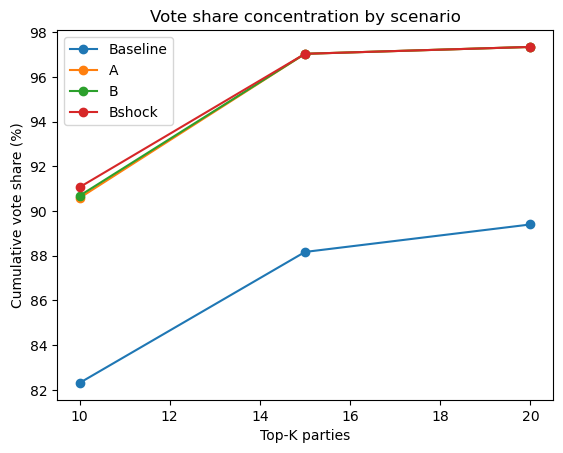

In [9]:
ks = [10, 15, 20]
vals = {
    "Baseline": [topk_sum(baseline, k) for k in ks],
    "A": [topk_sum(A, k) for k in ks],
    "B": [topk_sum(B, k) for k in ks],
    "Bshock": [topk_sum(Bshock, k) for k in ks]
}

plt.figure()
for name, v in vals.items():
    plt.plot(ks, v, marker="o", label=name)

plt.xlabel("Top-K parties")
plt.ylabel("Cumulative vote share (%)")
plt.title("Vote share concentration by scenario")
plt.legend()
plt.show()


## Nepal PR threshold rule (3%)

A party must receive at least **3% of valid votes nationally** to qualify for PR seats.

Votes for parties below the threshold are removed from the seat allocation base.
The remaining eligible parties are re-normalized and allocated PR seats using the **Sainte-Laguë method**.


In [10]:
THRESH = 3.0

def eligible_parties(df, col="pred_vote_share_national"):
    out = df.copy()
    out["eligible_3pct"] = out[col] >= THRESH
    return out.sort_values(col, ascending=False)

elig_base = eligible_parties(baseline)
elig_A = eligible_parties(A)
elig_B = eligible_parties(B)
elig_Bshock = eligible_parties(Bshock)

print("Eligible count (Baseline):", elig_base["eligible_3pct"].sum())
print("Eligible count (A):", elig_A["eligible_3pct"].sum())
print("Eligible count (B):", elig_B["eligible_3pct"].sum())
print("Eligible count (Bshock):", elig_Bshock["eligible_3pct"].sum())


Eligible count (Baseline): 8
Eligible count (A): 8
Eligible count (B): 8
Eligible count (Bshock): 8


In [11]:
cols = ["party_id", "pred_vote_share_national", "eligible_3pct"]

display_base = elig_base[cols].head(30)
display_A = elig_A[cols].head(30)
display_B = elig_B[cols].head(30)
display_Bshock = elig_Bshock[cols].head(30)

display_base


,party_id,pred_vote_share_national,eligible_3pct
0,P002,18.740812,True
1,P001,18.334889,True
2,P004,14.242661,True
3,P003,9.942509,True
4,P007,4.810570,True
5,P005,4.656625,True
6,P046,3.483480,True
7,P014,3.092513,True
8,P009,2.615698,False
9,P006,2.388144,False


In [12]:
def tag(df, name):
    d = df[["party_id", "pred_vote_share_national"]].copy()
    d = d.rename(columns={"pred_vote_share_national": f"share_{name}"})
    return d

m = tag(baseline, "baseline")
m = m.merge(tag(A, "A"), on="party_id", how="outer")
m = m.merge(tag(B, "B"), on="party_id", how="outer")
m = m.merge(tag(Bshock, "Bshock"), on="party_id", how="outer")

for c in ["share_baseline", "share_A", "share_B", "share_Bshock"]:
    m[c] = m[c].fillna(0)

for c in ["baseline", "A", "B", "Bshock"]:
    m[f"eligible_{c}"] = m[f"share_{c}"] >= THRESH

m.sort_values("share_baseline", ascending=False).head(25)


,party_id,share_baseline,share_A,share_B,share_Bshock,eligible_baseline,eligible_A,eligible_B,eligible_Bshock
1,P002,18.740812,20.626325,20.924454,19.223533,True,True,True,True
0,P001,18.334889,20.179562,19.438309,18.578813,True,True,True,True
3,P004,14.242661,15.675615,17.027564,21.768243,True,True,True,True
2,P003,9.942509,10.942825,10.641610,10.097054,True,True,True,True
6,P007,4.810570,5.294561,5.138892,4.883150,True,True,True,True
4,P005,4.656625,5.125128,5.072128,4.748477,True,True,True,True
44,P046,3.483480,3.833952,3.737187,3.539565,True,True,True,True
12,P014,3.092513,3.403650,3.341021,3.147448,True,True,True,True
7,P009,2.615698,2.878864,2.813050,2.659325,False,False,False,False
5,P006,2.388144,2.628415,2.552936,2.424574,False,False,False,False


## Seat allocation method: Sainte-Laguë

For eligible parties (>=3% nationally):
- votes/shares are effectively re-normalized
- seats are allocated iteratively using odd divisors (1, 3, 5, 7, ...)

This notebook uses the repo’s rule implementation outputs (`pr_seats_*.csv`).
We focus on interpretation: how scenarios change threshold crossing and seat counts.


In [13]:
seats_base.head(20), seats_A.head(20), seats_B.head(20), seats_Bshock.head(20)


(   party_id  pred_vote_share_national  eligible_pr_3pct  eligible_share_norm  \
 0      P002                 18.740812              True            24.242986   
 1      P001                 18.334889              True            23.717887   
 2      P004                 14.242661              True            18.424209   
 3      P003                  9.942509              True            12.861562   
 4      P007                  4.810570              True             6.222920   
 5      P005                  4.656625              True             6.023779   
 6      P046                  3.483480              True             4.506205   
 7      P014                  3.092513              True             4.000453   
 8      P009                  2.615698             False             0.000000   
 9      P006                  2.388144             False             0.000000   
 10     P057                  1.750161             False             0.000000   
 11     P010                

In [14]:
def seats_df(df, name):
    out = df[["party_id", "seats"]].copy()
    out = out.rename(columns={"seats": f"seats_{name}"})
    return out

sc = seats_df(seats_base, "baseline")
sc = sc.merge(seats_df(seats_A, "A"), on="party_id", how="outer")
sc = sc.merge(seats_df(seats_B, "B"), on="party_id", how="outer")
sc = sc.merge(seats_df(seats_Bshock, "Bshock"), on="party_id", how="outer")

sc = sc.fillna(0)
sc["seats_baseline"] = sc["seats_baseline"].astype(int)
sc["seats_A"] = sc["seats_A"].astype(int)
sc["seats_B"] = sc["seats_B"].astype(int)
sc["seats_Bshock"] = sc["seats_Bshock"].astype(int)

sc["delta_A"] = sc["seats_A"] - sc["seats_baseline"]
sc["delta_B"] = sc["seats_B"] - sc["seats_baseline"]
sc["delta_Bshock"] = sc["seats_Bshock"] - sc["seats_baseline"]

sc.sort_values("seats_baseline", ascending=False).head(25)


,party_id,seats_baseline,seats_A,seats_B,seats_Bshock,delta_A,delta_B,delta_Bshock
1,P002,27,27,27,24,0,0,-3
0,P001,26,26,25,24,0,-1,-2
3,P004,20,20,22,28,0,2,8
2,P003,14,14,14,13,0,0,-1
4,P005,7,7,6,6,0,-1,-1
6,P007,7,7,7,6,0,0,-1
44,P046,5,5,5,5,0,0,0
12,P014,4,4,4,4,0,0,0
49,P051,0,0,0,0,0,0,0
57,P059,0,0,0,0,0,0,0


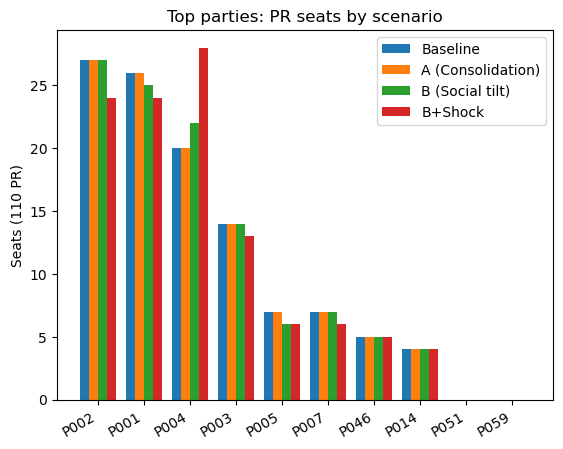

In [15]:
top_parties = sc.sort_values("seats_baseline", ascending=False).head(10)["party_id"].tolist()
sc_top = sc[sc["party_id"].isin(top_parties)].set_index("party_id").loc[top_parties]

x = np.arange(len(sc_top.index))
width = 0.2

plt.figure()
plt.bar(x - 1.5*width, sc_top["seats_baseline"], width, label="Baseline")
plt.bar(x - 0.5*width, sc_top["seats_A"], width, label="A (Consolidation)")
plt.bar(x + 0.5*width, sc_top["seats_B"], width, label="B (Social tilt)")
plt.bar(x + 1.5*width, sc_top["seats_Bshock"], width, label="B+Shock")

plt.xticks(x, sc_top.index, rotation=30, ha="right")
plt.ylabel("Seats (110 PR)")
plt.title("Top parties: PR seats by scenario")
plt.legend()
plt.savefig("data/outputs/figures/PR_seats_by_scenario.png", dpi=200, bbox_inches="tight")
plt.show()


## What matters in scenario comparisons

Two mechanisms drive differences:
1. **Threshold crossing** (3%): small changes around 3% can cause large seat discontinuities.
2. **Reallocation among eligible parties**: once in the eligible set, relative share affects seat distribution.

So the key outputs are:
- which parties qualify (>=3%)
- how vote share among eligible parties shifts
- resulting seat totals


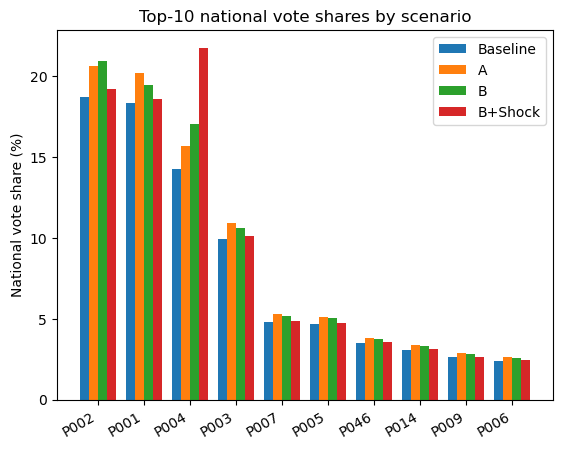

In [16]:
def topn(df, n=10, col="pred_vote_share_national"):
    return df.sort_values(col, ascending=False).head(n)[["party_id", col]]

top = topn(baseline, 10)
parties = top["party_id"].tolist()

def shares_for(df, parties):
    s = df.set_index("party_id")["pred_vote_share_national"]
    return [s.get(p, 0.0) for p in parties]

plt.figure()
x = np.arange(len(parties))
width = 0.2

plt.bar(x - 1.5*width, shares_for(baseline, parties), width, label="Baseline")
plt.bar(x - 0.5*width, shares_for(A, parties), width, label="A")
plt.bar(x + 0.5*width, shares_for(B, parties), width, label="B")
plt.bar(x + 1.5*width, shares_for(Bshock, parties), width, label="B+Shock")

plt.xticks(x, parties, rotation=30, ha="right")
plt.ylabel("National vote share (%)")
plt.title("Top-10 national vote shares by scenario")
plt.legend()
plt.show()


In [17]:
compare.head(20)


,party_id,share_baseline,share_A,share_B,share_Bshock,shock_i,z_social,delta_A,delta_B,delta_Bshock
0,P002,18.740812,20.626325,20.924454,19.223533,0,1.267152,1.885513,2.183642,0.482721
1,P001,18.334889,20.179562,19.438309,18.578813,0,-1.375575,1.844673,1.103420,0.243924
2,P004,14.242661,15.675615,17.027564,21.768243,1,3.337875,1.432954,2.784903,7.525582
3,P003,9.942509,10.942825,10.641610,10.097054,0,-0.753131,1.000316,0.699100,0.154545
4,P007,4.810570,5.294561,5.138892,4.883150,0,-0.872308,0.483991,0.328322,0.072580
5,P005,4.656625,5.125128,5.072128,4.748477,0,0.199760,0.468503,0.415503,0.091852
6,P046,3.483480,3.833952,3.737187,3.539565,0,-0.612429,0.350473,0.253708,0.056085
7,P014,3.092513,3.403650,3.341021,3.147448,0,-0.219053,0.311138,0.248509,0.054936
8,P009,2.615698,2.878864,2.813050,2.659325,0,-0.471214,0.263165,0.197351,0.043627
9,P006,2.388144,2.628415,2.552936,2.424574,0,-0.828358,0.240271,0.164792,0.036429


## Notes on sentiment tilt and shock scenarios (disclaimer)

The social scenario is a **bounded overlay**, not a direct “social -> votes” mapping.
It is designed to reflect *late-stage coordination and momentum* in a volatile election.

- Engagement ≠ ballots
- Online users are not representative
- Effects are scenario parameters, controlled via `config/pr_consolidation.json`

This is why the repo presents multiple scenarios rather than a single “final truth.”


In [18]:
def around_threshold(df, window=1.0):
    d = df.copy()
    d = d.sort_values("pred_vote_share_national", ascending=False)
    return d[(d["pred_vote_share_national"] >= (3.0 - window)) & (d["pred_vote_share_national"] <= (3.0 + window))]

around_threshold(baseline, 1.0)


,party_id,pred_vote_share_national
6,P046,3.483480
7,P014,3.092513
8,P009,2.615698
9,P006,2.388144


In [19]:
eligible = baseline[baseline["pred_vote_share_national"] >= 3.0].copy()
eligible["renorm_share"] = eligible["pred_vote_share_national"] / eligible["pred_vote_share_national"].sum() * 100
eligible["renorm_share"].sum()


np.float64(100.0)